<a href="https://colab.research.google.com/github/Satwikram/Named-Entity-Recognition/blob/main/Named%20Entity%20Recognition%20using%20DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Author: Satwik Ram K

**Named Entity Recognition on Dataset Using NLP**

Context:
Annotated Corpus for Named Entity Recognition using GMB(Groningen Meaning Bank) corpus for entity classification with enhanced and popular features by Natural Language Processing applied to the data set.

geo = Geographical Entity

org = Organization

per = Person

gpe = Geopolitical Entity

tim = Time indicator

art = Artifact

eve = Event

nat = Natural Phenomenon

### Connecting to Kaggle

In [ ]:
from google.colab import files

files.upload()


! mkdir ~/.kaggle


! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


### Downloading Dataset 

In [ ]:
!kaggle datasets download -d abhinavwalia95/entity-annotated-corpus

 34% 9.00M/26.4M [00:00<00:00, 34.7MB/s]
100% 26.4M/26.4M [00:00<00:00, 66.8MB/s]


In [ ]:
!unzip /content/entity-annotated-corpus.zip

Archive:  /content/entity-annotated-corpus.zip
  inflating: ner.csv                 
  inflating: ner_dataset.csv         


### Importing Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import math 
from bs4 import BeautifulSoup

### Importing Dataset

In [ ]:
dataset = pd.read_csv("/content/ner_dataset.csv", encoding = "latin1")

In [ ]:
dataset.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


### Basic Info

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Sentence #  47959 non-null    object
 1   Word        1048575 non-null  object
 2   POS         1048575 non-null  object
 3   Tag         1048575 non-null  object
dtypes: object(4)
memory usage: 32.0+ MB


In [ ]:
dataset.describe()

,Sentence #,Word,POS,Tag
count,47959,1048575,1048575,1048575
unique,47959,35178,42,17
top,Sentence: 12133,the,NN,O
freq,1,52573,145807,887908


### Checking for Null Values

In [ ]:
dataset.isna().sum()

Sentence #    1000616
Word                0
POS                 0
Tag                 0
dtype: int64

### Dropping Unwanted Columns

In [ ]:
dataset.columns

Index(['Sentence #', 'Word', 'POS', 'Tag'], dtype='object')

In [ ]:
columns = ['Sentence #', 'POS']

In [ ]:
dataset.drop(columns = columns, axis = 1, inplace = True)

In [ ]:
dataset.head()

,Word,Tag
0,Thousands,O
1,of,O
2,demonstrators,O
3,have,O
4,marched,O


### Plotting Different Sentiment

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


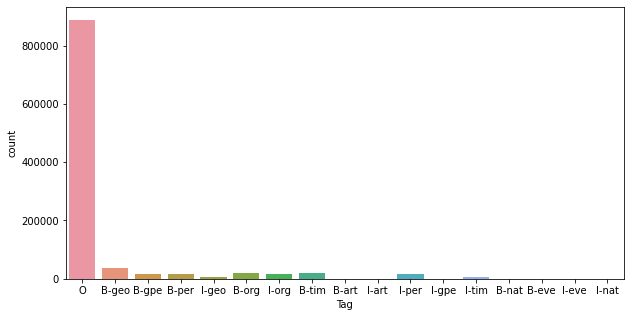

In [ ]:
plt.figure(figsize = (10, 5) )
sns.countplot(dataset['Tag'], label = 'Count')

### Getting Unique Values

In [ ]:
dataset['Tag'].nunique()

17

In [ ]:
len(dataset)

1048575

In [ ]:
dataset['Tag'].value_counts()

O        887908
B-geo     37644
B-tim     20333
B-org     20143
I-per     17251
B-per     16990
I-org     16784
B-gpe     15870
I-geo      7414
I-tim      6528
B-art       402
B-eve       308
I-art       297
I-eve       253
B-nat       201
I-gpe       198
I-nat        51
Name: Tag, dtype: int64

In [ ]:
2**20

1048576

In [ ]:
dataset['Word']

0              Thousands
1                     of
2          demonstrators
3                   have
4                marched
               ...      
1048570             they
1048571        responded
1048572               to
1048573              the
1048574           attack
Name: Word, Length: 1048575, dtype: object

### Cleaning The Dataset if noise exits

In [ ]:
def clean_data(word):
  word = BeautifulSoup(word, 'lxml').get_text()
  word = re.sub(r"@[A-Za-z0-9]+", "", word)
  word = re.sub(r"https?://[A-Za-z0-9./]", "", word)
  word = re.sub(r"[^A-Za-z]", "", word)
  word = re.sub(r" +", '', word)
  return word

In [ ]:
from tqdm import tqdm

In [ ]:
dataset['Word'][0]

'Thousands'

In [ ]:
for i in tqdm(range(len(dataset))):
  dataset['Word'][i] = clean_data(dataset['Word'][i])

  0%|          | 0/1048575 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
  1%|▏         | 13146/1048575 [00:45<1:00:33, 284.96it/s]/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:273: UserWarning: "b'/'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
 19%|█▊        | 196088/1048575 [14:41<1:16:46, 185.06it/s]/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "https://www.celebritiesforcharity.org/raffles/netraffle_main.cfm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
 46%|█

Buffered data was truncated after reaching the output size limit.

In [ ]:
dataset.to_csv("NER_Cleaned.csv", index = None, header = True)

### Loading cleaned file

In [3]:
ner_dataset = pd.read_csv("/content/NER_Cleaned.csv")

In [4]:
ner_dataset.head()

,Word,Tag
0,Thousands,O
1,of,O
2,demonstrators,O
3,have,O
4,marched,O


In [5]:
len(ner_dataset)

1048575

### Checking for NaN Values After Cleaning

In [6]:
ner_dataset.isna().sum()

Word    103876
Tag          0
dtype: int64

### Dropping NaN Values

In [7]:
ner_dataset.dropna(inplace = True)

In [8]:
ner_dataset.isna().sum()

Word    0
Tag     0
dtype: int64

In [9]:
len(ner_dataset)

944699

In [12]:
2**20

1048576

### Tokenization

In [13]:
import tensorflow_datasets as tfds

In [14]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    ner_dataset['Word'],
    target_vocab_size = 2**20
)

### Saving The Tokenizer

In [15]:
tokenizer.save_to_file('ner_tokenizer')

In [ ]:
ner_dataset['Word']

0              Thousands
1                     of
2          demonstrators
3                   have
4                marched
               ...      
1048570             they
1048571        responded
1048572               to
1048573              the
1048574           attack
Name: Word, Length: 944699, dtype: object

### Loading Tokenizer

In [ ]:
encoder = tfds.deprecated.text.SubwordTextEncoder.load_from_file("tokenizer")

**Testing Tokenizer**

In [ ]:
ids = encoder.encode("hello world")

In [ ]:
text = encoder.decode([23108, 32928, 32849, 138])

In [ ]:
print(ids)
print(text)

[23108, 32928, 32849, 138]
hello world


In [ ]:
dataset['Word'][100] = encoder.encode(dataset['Word'][100])

In [ ]:
dataset['Word'][100]

[1]

### Tokenizing the Dataset

In [ ]:
for i in tqdm(range(len(ner_dataset))):
  ner_dataset['Word'][i] = 